## 시각화 01

In [2]:
import fontda
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
#데이터 불러오기
file='data/GallupReport_스마트폰.xlsx'
df=pd.read_excel(file,header=6,usecols=[0,2])
df.head()

,Unnamed: 0,Unnamed: 2
0,2012년 1월,53.4
1,3월,58.8
2,NaN,NaN
3,5월,58.6
4,NaN,NaN


In [4]:
# 결측치 행 제거
df.dropna(inplace=True)
df.head(15)

,Unnamed: 0,Unnamed: 2
0,2012년 1월,53.4
1,3월,58.8
3,5월,58.6
5,7월,61.9
7,9월,65.1
9,11월,67.0
11,2013년 1월,68.4
13,3월,71.1
15,5월,72.4
17,7월,73.4


In [5]:
# 년, 사용률만 남기기
df.columns=['year','use']
df.head(15)

,year,use
0,2012년 1월,53.4
1,3월,58.8
3,5월,58.6
5,7월,61.9
7,9월,65.1
9,11월,67.0
11,2013년 1월,68.4
13,3월,71.1
15,5월,72.4
17,7월,73.4


In [6]:
# new_year 열 에서 년도만 남기고 결측값은 이전값으로 채우기
df['new_year']=df['year'].copy()
def func2(x):
    return x.split("   ")[0]  if len(x.split("   "))==2 else np.nan

df['new_year']=df['new_year'].apply(func2)
df.head()

,year,use,new_year
0,2012년 1월,53.4,2012년
1,3월,58.8,NaN
3,5월,58.6,NaN
5,7월,61.9,NaN
7,9월,65.1,NaN


In [7]:
df['new_year']=df['new_year'].fillna(method='ffill')
df.head()

C:\Users\KDP-13\AppData\Local\Temp\ipykernel_5772\2568598169.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['new_year']=df['new_year'].fillna(method='ffill')


,year,use,new_year
0,2012년 1월,53.4,2012년
1,3월,58.8,2012년
3,5월,58.6,2012년
5,7월,61.9,2012년
7,9월,65.1,2012년


In [8]:
df['new_year']=df['new_year'].str.replace('년',"").astype(int)
df.head()

,year,use,new_year
0,2012년 1월,53.4,2012
1,3월,58.8,2012
3,5월,58.6,2012
5,7월,61.9,2012
7,9월,65.1,2012


In [9]:
#년도를 그룹으로 묶어서 최소값만 뽑기
smart=df.groupby('new_year').agg({'use':'min'})
smart=smart.iloc[:7]
smart

,use
new_year,
2012,53.4
2013,68.4
2014,76.1
2015,82.3
2016,87.7
2017,91.3
2018,92.9


In [10]:
# 학업성취도평가 읽기능력 모듈로 불러오기
pisa=fontda.pisa()
pisa=pisa.T
pisa

,대한민국
2012,536.5
2015,518.5
2018,514.5


In [11]:
pisa.index

Index([2012, 2015, 2018], dtype='int64')

In [12]:
pisa.loc[2012].values

array([536.5])

In [13]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

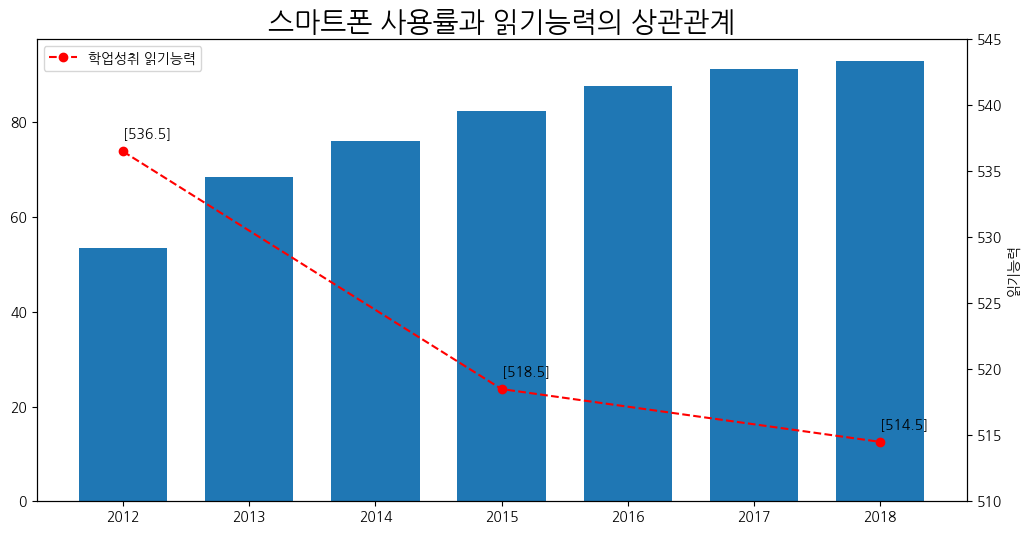

In [14]:
plt.figure(figsize=(12, 6))

plt.bar(smart.index,smart['use'].values,width=0.7)
ax1=plt.twinx()
ax1.plot(pisa.index,pisa.values,color='red',ls='--',marker='o')

# 선그래프에 마커값 추가
for i in pisa.index:
    v = pisa.loc[i].values
    ax1.text(x=i,y=v+1,s=v)    # s 가 값이고 x,y 는 위치!!1


plt.ylim(40,100)
ax1.set_ylim(510,545)

ax1.legend(['학업성취 읽기능력'],loc='upper left')

plt.title("스마트폰 사용률과 읽기능력의 상관관계",size=20)
plt.xlabel('년도')
plt.ylabel('사용률')
ax1.set_ylabel('읽기능력')


plt.show()
